In [30]:
!pip install pandas
!pip install numpy
!pip install matplotlib

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ETL Pipeline
As mentioned before, the model will be trained to predict data from sensor LIT101, so this along with the timestamps will be the only useful information to keep.

Load data.

In [32]:
train = pd.read_csv('data-raw/train.csv', delimiter = ',', skipinitialspace = True)
test = pd.read_csv('data-raw/test.csv', delimiter = ',', skipinitialspace = True)

Convert timestamps to datetime.

In [33]:
train['Timestamp'] = pd.to_datetime(train['Timestamp'], format='%d/%m/%Y %I:%M:%S %p')
test['Timestamp'] = pd.to_datetime(test['Timestamp'], format='%d/%m/%Y %I:%M:%S %p')

Remove the data before 2015-12-23 as it shows sensor initialization.

In [34]:
train = train[train['Timestamp'] > '2015-12-23']

As mentioned in the data exploration part, only sensor LIT101 will be used.
Eliminate information from all the other sensors. Create a new df for train labels and make the labels all 0 (normal behavior).

In [35]:
y_train = train[['Normal/Attack']]
y_train.rename(columns={'Normal/Attack': 'Label'}, inplace=True)
y_train['Label'] = y_train['Label'].apply(lambda x: 0 if x == 'Normal' else 1)

x_train = train[['Timestamp', 'LIT101']]

C:\Users\ignac\AppData\Local\Temp\ipykernel_13852\3534195741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.rename(columns={'Normal/Attack': 'Label'}, inplace=True)
C:\Users\ignac\AppData\Local\Temp\ipykernel_13852\3534195741.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['Label'] = y_train['Label'].apply(lambda x: 0 if x == 'Normal' else 1)


Do the same for the test data, but remove the 'Normal/Attack' column as it does not contribute any information.

In [36]:
x_test = test[['Timestamp', 'LIT101']]

Normalise the sensor value columns by applying zero-mean normalization.

In [37]:
train_mean = np.mean(train['LIT101'])
train_sd = np.std(train['LIT101'])
x_train['LIT101'] = x_train['LIT101'].apply(lambda x: (x - train_mean) / train_sd)

test_mean = np.mean(test['LIT101'])
test_sd = np.std(test['LIT101'])
x_test['LIT101'] = x_test['LIT101'].apply(lambda x: (x - test_mean) / test_sd)

C:\Users\ignac\AppData\Local\Temp\ipykernel_13852\1225364322.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['LIT101'] = x_train['LIT101'].apply(lambda x: (x - train_mean) / train_sd)
C:\Users\ignac\AppData\Local\Temp\ipykernel_13852\1225364322.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['LIT101'] = x_test['LIT101'].apply(lambda x: (x - test_mean) / test_sd)


Visualize new data.

In [38]:
def visualize(df):
    plt.figure(figsize=(15, 8))
    plt.plot(df['Timestamp'], df['LIT101'], label='LIT101')
    plt.xlabel('Timestamp')
    plt.ylabel('Sensor Values')
    plt.title('Sensor Data Visualization')
    plt.legend()

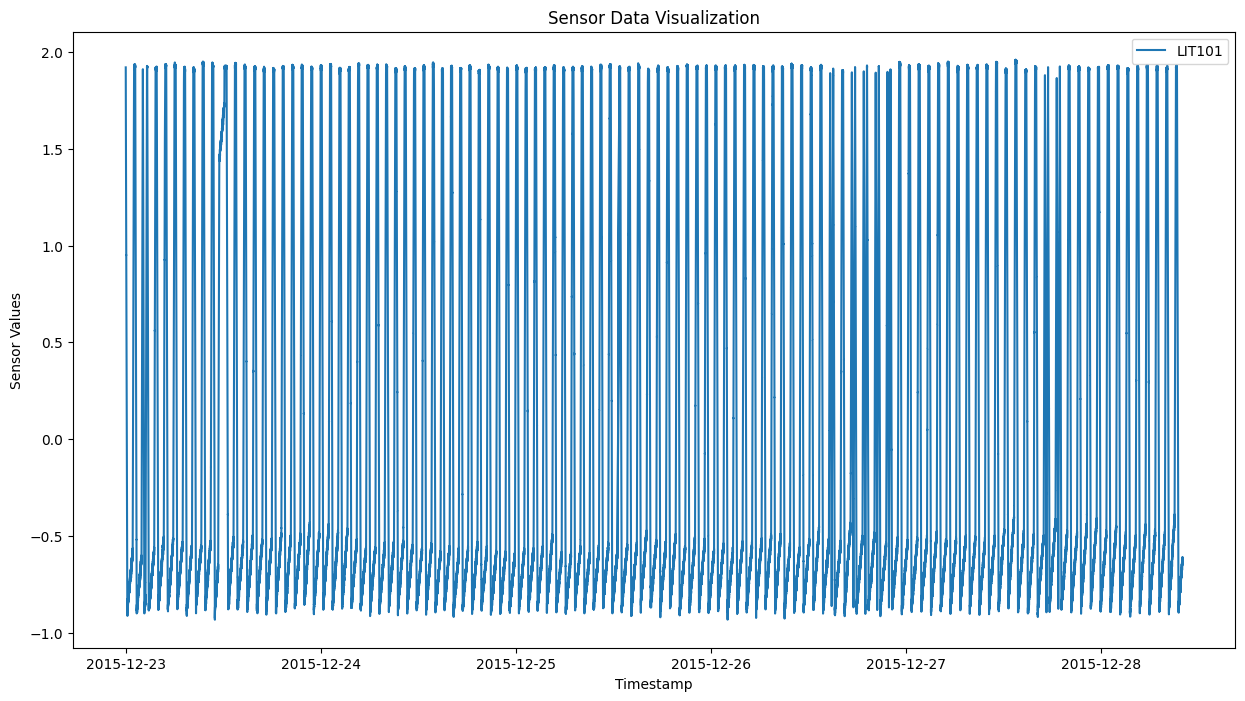

In [39]:
visualize(x_train)

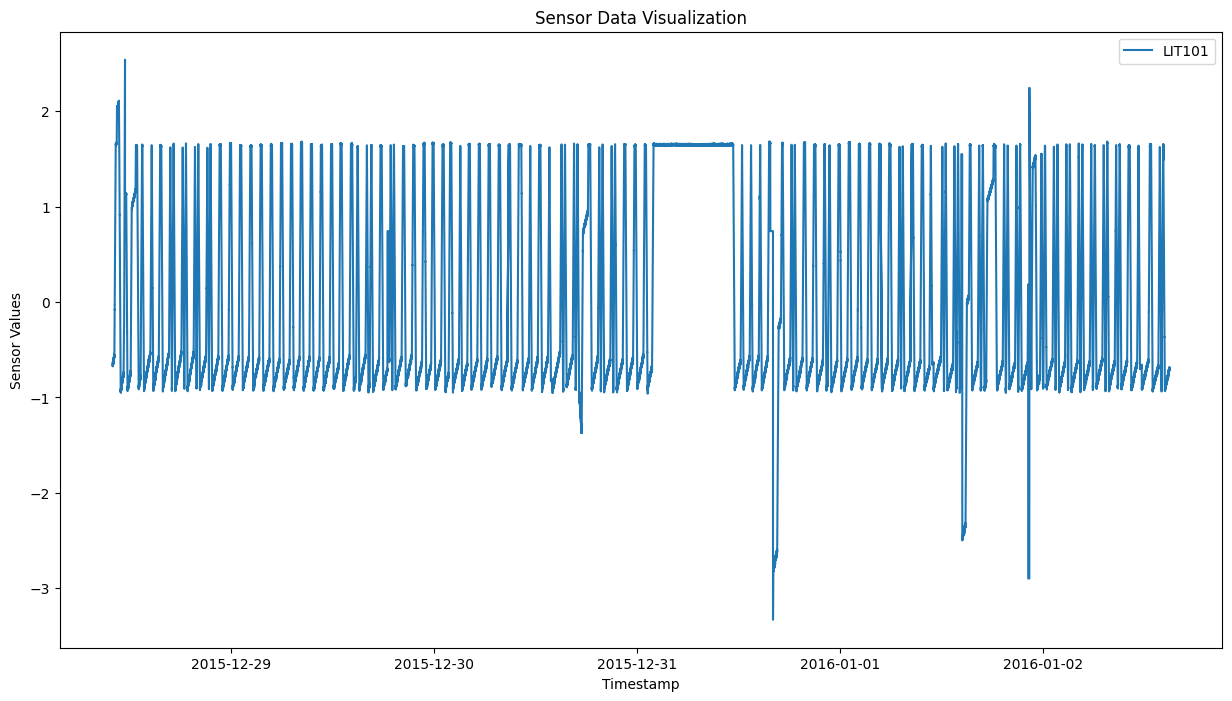

In [40]:
visualize(x_test)

Data is now ready to be exported into new csv files.

In [44]:
x_train.to_csv('data-etl/x_train.csv')
x_test.to_csv('data-etl/x_test.csv')
y_train.to_csv('data-etl/y_train.csv')